In [1]:

%pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
file_path = "../data/sample_fuel_telemetry.csv"  
df = pd.read_csv(file_path)

In [4]:
# Display basic info
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vehicle_id     9 non-null      object 
 1   timestamp      9 non-null      object 
 2   location_lat   9 non-null      float64
 3   location_lon   9 non-null      float64
 4   engine_status  9 non-null      object 
 5   fuel_level     9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 560.0+ bytes
None


In [5]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
vehicle_id       0
timestamp        0
location_lat     0
location_lon     0
engine_status    0
fuel_level       0
dtype: int64


In [6]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       location_lat  location_lon  fuel_level
count      9.000000      9.000000    9.000000
mean       0.143578     36.821978   79.555556
std        1.362004      0.000199    7.954733
min       -1.292100     36.821900   69.000000
25%       -1.292100     36.821900   72.000000
50%        1.292100     36.821900   78.000000
75%        1.292100     36.821900   85.000000
max        1.292200     36.822500   90.000000


In [7]:
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

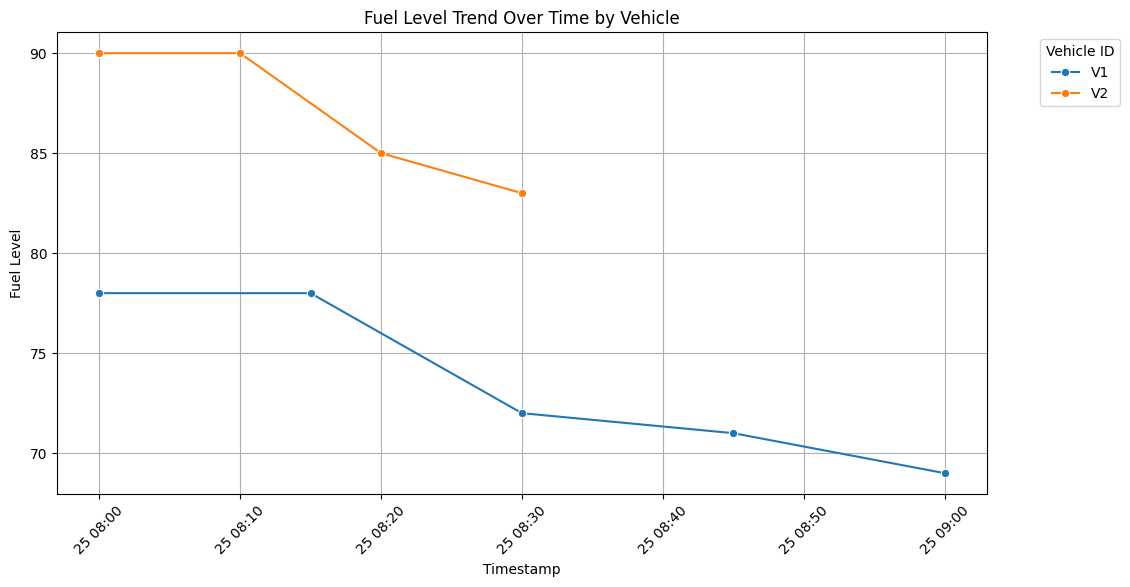

In [8]:
# Plot fuel level over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='timestamp', y='fuel_level', hue='vehicle_id', marker='o')
plt.xlabel("Timestamp")
plt.ylabel("Fuel Level")
plt.title("Fuel Level Trend Over Time by Vehicle")
plt.xticks(rotation=45)
plt.legend(title="Vehicle ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [9]:
import pandas as pd

# Identify possible siphonage events (drops when engine is OFF)
if {'fuel_level', 'engine_status', 'vehicle_id'}.issubset(df.columns):
    df['fuel_drop'] = df.groupby('vehicle_id')['fuel_level'].diff()  # Compute drop per vehicle
    
    # Detect siphonage: drop > 5 units & engine OFF
    siphonage_events = df[(df['fuel_drop'] < -5) & (df['engine_status'] == "OFF")]
    
    # Display results in a structured table
    if not siphonage_events.empty:
        print("\n Potential Fuel Siphonages:")
        print(siphonage_events[['vehicle_id', 'timestamp', 'fuel_drop', 'engine_status']].to_string(index=False))
    else:
        print("\n No siphonage events detected.")

else:
    print("Required columns ('fuel_level', 'engine_status', 'vehicle_id') not found in dataset.")




 Potential Fuel Siphonages:
vehicle_id           timestamp  fuel_drop engine_status
        V1 2025-03-25 08:30:00       -6.0           OFF
